In [ ]:
#prac 10: Compare various unsupervised learning algorithms using appropriate data

K-Means Silhouette Score: 0.434


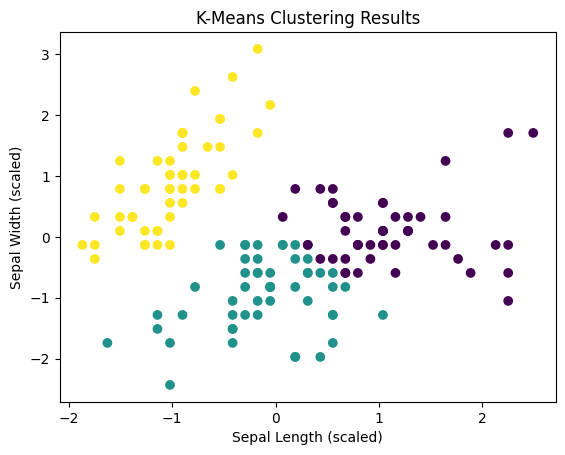

===
Hierarchical Silhouette Score: 0.439


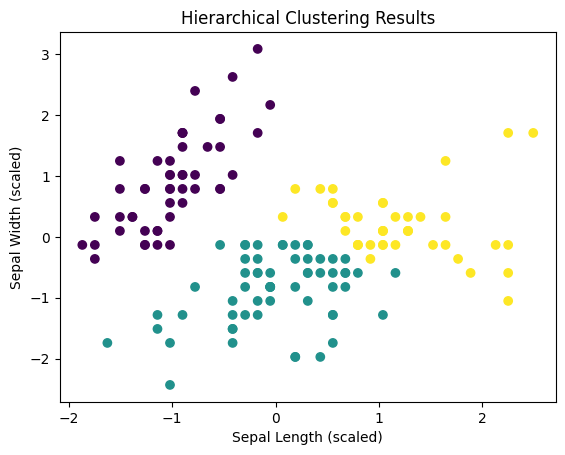

===
DBSCAN Silhouette Score: 0.392


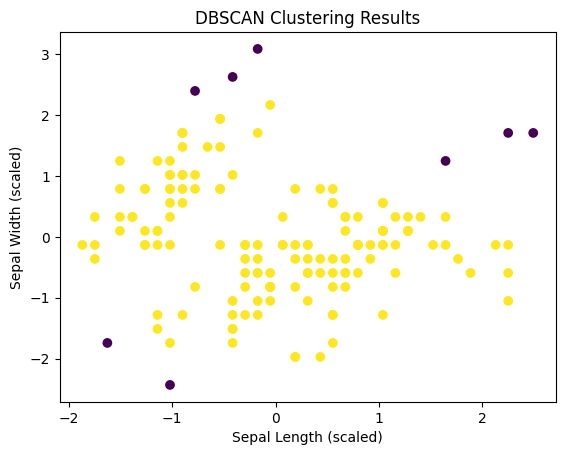

===
GMM Silhouette Score: 0.436


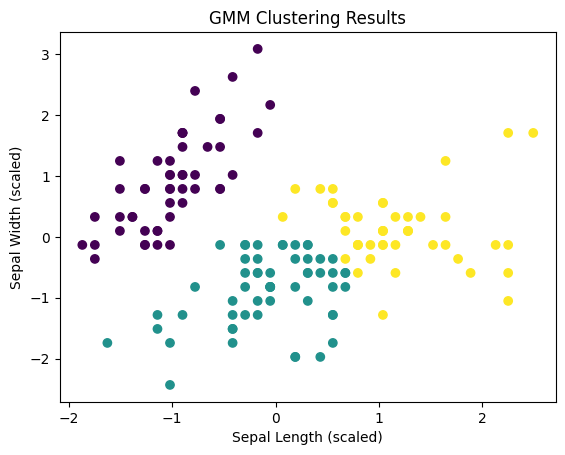

===


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the Iris dataset and select two features: Sepal Length and Sepal Width
data = load_iris()
X = data.data[:, [0, 1]]

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define clustering algorithms to apply
algorithms = {
    'K-Means': KMeans(n_clusters=3),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=3)
}

# Visualization function for clustering results
def visualize_results(name, labels):
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f"{name} Clustering Results")
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Sepal Width (scaled)")
    plt.show()

# Apply each algorithm, calculate silhouette scores, and visualize results
for name, algorithm in algorithms.items():
    algorithm.fit(X_scaled)
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        labels = algorithm.predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"{name} Silhouette Score: {silhouette_avg:.3f}")

    visualize_results(name, labels)
    print("===")
